### Noise Level Threshold Experiment

#### Results Link: https://docs.google.com/document/d/15AEI4oziVOkIzEgLipM6_aYbwfpDE-pBz1AqU2KTvVw/edit?tab=t.0

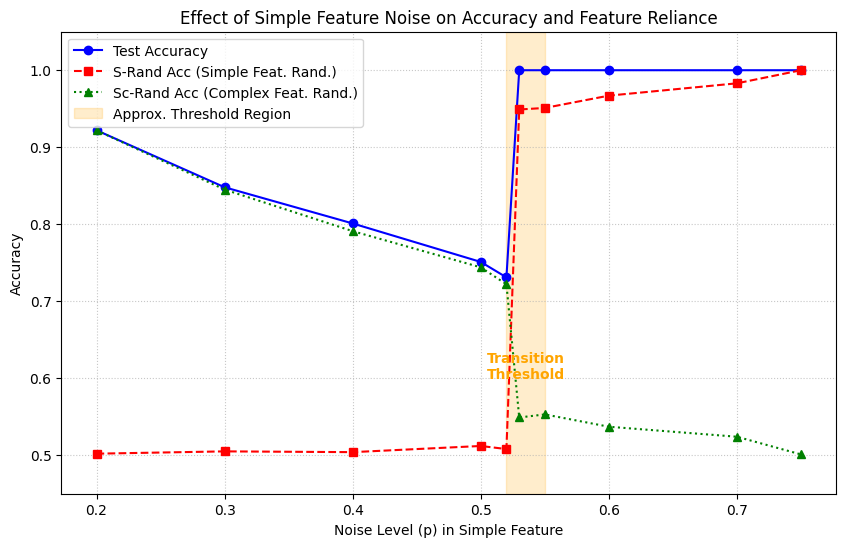

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from your results ---
# Noise levels (p_noise)
p_noise = [0.2, 0.3, 0.4, 0.5, 0.52, 0.53, 0.55, 0.6, 0.7, 0.75] # Sorted noise levels for plotting

# Corresponding accuracy values
# Note: Assuming '>=' means 0.75, '<=' means 0.2 based on order
test_accuracy =       [0.922, 0.848, 0.801, 0.751, 0.731, 1.000, 1.000, 1.000, 1.000, 1.000]
s_rand_accuracy =     [0.502, 0.505, 0.504, 0.512, 0.508, 0.949, 0.951, 0.967, 0.983, 1.000]
sc_rand_accuracy =    [0.922, 0.845, 0.791, 0.744, 0.722, 0.549, 0.553, 0.537, 0.524, 0.501]
# --- End of Data ---

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

# Plot the lines
ax.plot(p_noise, test_accuracy, marker='o', linestyle='-', color='blue', label='Test Accuracy')
ax.plot(p_noise, s_rand_accuracy, marker='s', linestyle='--', color='red', label='S-Rand Acc (Simple Feat. Rand.)')
ax.plot(p_noise, sc_rand_accuracy, marker='^', linestyle=':', color='green', label='Sc-Rand Acc (Complex Feat. Rand.)')

# Highlight the threshold region
threshold_low = 0.52
threshold_high = 0.55
ax.axvspan(threshold_low, threshold_high, color='orange', alpha=0.2, label='Approx. Threshold Region')
ax.text( (threshold_low + threshold_high)/2 , 0.6, 'Transition\nThreshold', horizontalalignment='center', color='orange', weight='bold')


# Add labels and title
ax.set_xlabel('Noise Level (p) in Simple Feature')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Simple Feature Noise on Accuracy and Feature Reliance')

# Add legend
ax.legend()

# Set Y-axis limits for better visualization (optional)
ax.set_ylim(0.45, 1.05)

# Add grid for readability
ax.grid(True, linestyle=':', alpha=0.7)

# Display the plot
plt.show()

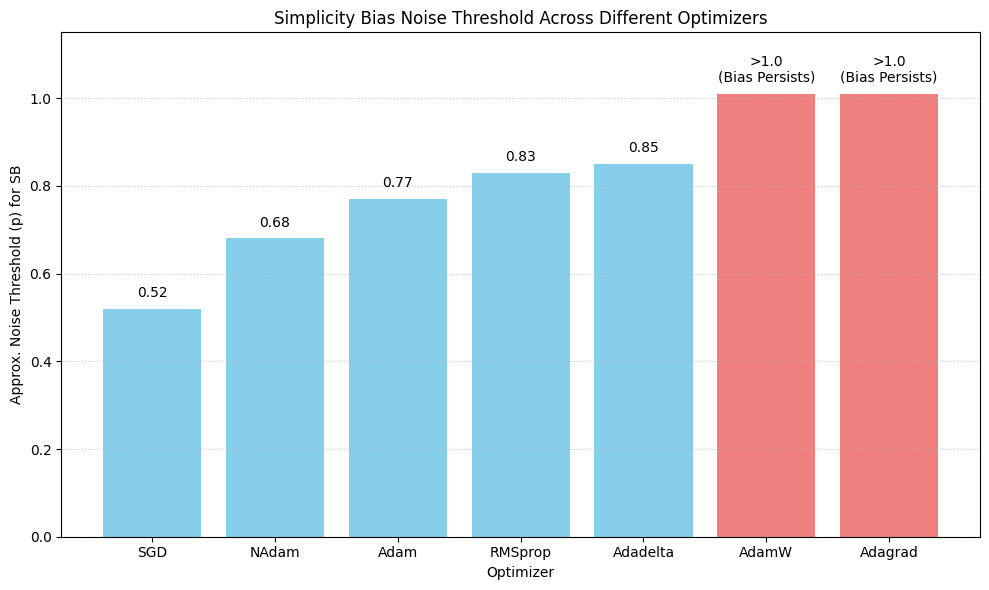

In [4]:
import matplotlib.pyplot as plt

# --- Data ---
optimizers = ['SGD', 'NAdam', 'Adam', 'RMSprop', 'Adadelta', 'AdamW', 'Adagrad']
# Thresholds - using 1.01 as a placeholder for ">1.0" for plotting height,
# we'll annotate it properly.
thresholds = [0.52, 0.68, 0.77, 0.83, 0.85, 1.01, 1.01] # Match order with optimizers
# Indicate which ones are ">1.0"
still_biased = [False, False, False, False, False, True, True]

# --- Create Bar Chart ---
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size

colors = ['skyblue' if not biased else 'lightcoral' for biased in still_biased]

bars = ax.bar(optimizers, thresholds, color=colors)

# Add title and labels
ax.set_ylabel('Approx. Noise Threshold (p) for SB')
ax.set_xlabel('Optimizer')
ax.set_title('Simplicity Bias Noise Threshold Across Different Optimizers')

# Set Y-axis limit slightly above 1.0 to accommodate annotations
ax.set_ylim(0, 1.15)

# Add data labels and annotations for ">1.0"
for i, bar in enumerate(bars):
    height = bar.get_height()
    label_text = f'{thresholds[i]:.2f}' if not still_biased[i] else '>1.0\n(Bias Persists)'
    # Adjust text position based on whether it's the ">1.0" case
    text_y = height + 0.02 if not still_biased[i] else 1.03
    ax.text(bar.get_x() + bar.get_width() / 2., text_y, label_text,
            ha='center', va='bottom')

# Optional: Add horizontal grid lines
ax.yaxis.grid(True, linestyle=':', alpha=0.7)

# Optional: Rotate x-axis labels if needed
# plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()